In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

In [2]:
import cloning
from multiprocessing import Pool
from itertools import repeat
pool = Pool(processes=4)

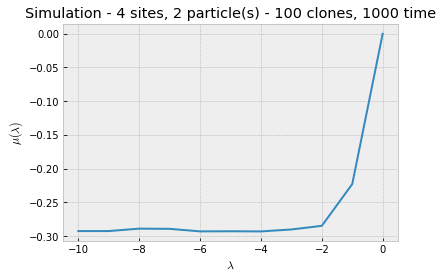

In [6]:
alpha, T = 1, 1000  # jumping rate, observation time
L, M, clon = 4, 2, 100  # number of sites, particles, clones in ensemble

mus = []  # list of large deviation functions
lambdas = np.arange(-10, 1, 1)
mus = pool.starmap(
    cloning.main,
    zip(
        lambdas,
        repeat(alpha),
        repeat(T),
        repeat(L),
        repeat(M),
        repeat(clon)
    )
)

plt.plot(lambdas, mus)
plt.title(
    f'Simulation - {L} sites, {M} particle(s) - {clon} clones, {T} time'
)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\mu(\lambda)$')
plt.show()

/home/sesh/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


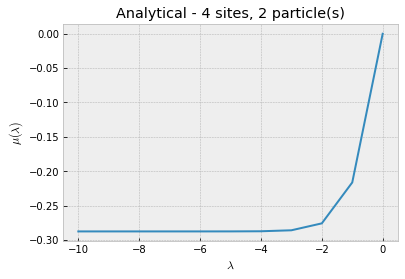

In [7]:
# Analytical results for a TASEP of 4 sites and 2 particles:
eigmus = []
lams = np.arange(-10, 1, 1)
alpha = 1

for lam in lams:
    U = np.array([
        [1 - (alpha/4), 0, 0, 0, alpha/4, 0],
        [alpha/4, 1 - 2*(alpha/4), 0, 0, 0, alpha/4],
        [0, alpha/4, 1 - (alpha/4), 0, 0, 0],
        [0, alpha/4, 0, 1 - (alpha/4), 0, 0],
        [0, 0, alpha/4, alpha/4, 1 - 2*(alpha/4), 0],
        [0, 0, 0, 0, alpha/4, 1 - (alpha/4)]
    ])

    J = np.array([
        [0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0]
    ])

    UT = np.exp(lam*J)*U

    eigmus.append(
        np.log(
            np.amax(np.linalg.eig(UT)[0])
        )
    )

plt.plot(lams, eigmus)
plt.title('Analytical - 4 sites, 2 particle(s)')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\mu(\lambda)$')
plt.show()